In [1]:
import numpy as np

In [2]:
# read insurance.csv
data = np.genfromtxt('insurance.csv', delimiter = ',', dtype=None, encoding='UTF-8', names=True)
len(data)

1338

In [3]:
import matplotlib.pyplot as plt


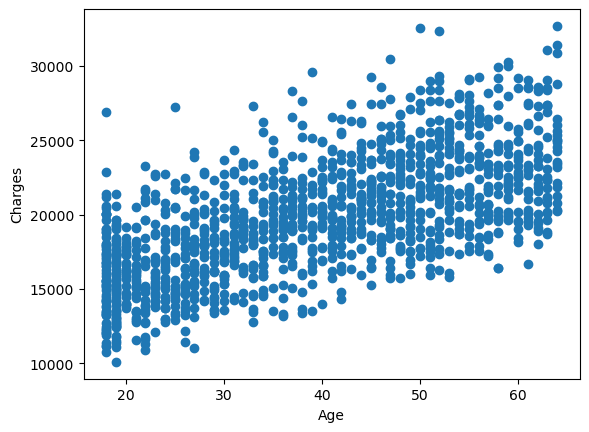

In [4]:
# make scatterplot of Age and Charges
plt.scatter(data["age"],data["charges"])
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

In [5]:
# My observation is this looks like a general linear relationship.

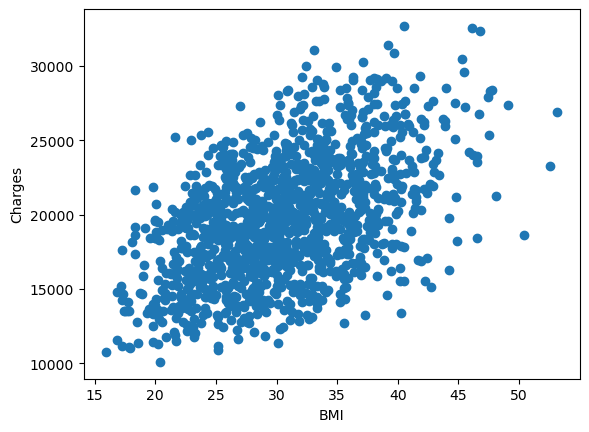

In [6]:
# make scatterplot of BMI and Charges
plt.scatter(data["bmi"],data["charges"])
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()

In [7]:
# my observation is this looks like a clustering of BMI and associated charges

### Create a Multiple Linear Regression Model

Create a multiple regression model using age, bmi, and children as three predictors and charges as the target variable. Make sure to:
<br> 1- reshape all predictor arrays as needed and concatenate them into a single array with 3 columns.
<br> 2- split the data into two subsets (80% train and 20% test) and use only the train subset to build the regression model.
<br> 3- import and use appropriate functions to print out the y-intercept and the beta coefficients of the trained model. Then using python comments (using #) in a Code Cell interpret and explain the coefficient associated with Age. 


In [8]:
# E(Y) = B0 + B1(age) + B2(bmi) + B3(children)
# linear model import
import sklearn.linear_model as lm


In [9]:
#
## multipe linear regression
#
# condition data or data preparation
# reshape data
x1 = np.reshape(data["age"],(-1,1))
x2 = np.reshape(data["bmi"],(-1,1))
x3 = np.reshape(data["children"],(-1,1))

y = np.reshape(data["charges"],(-1,1))

#concatenate
# axis = 0 >>  ROW
# axis = 1 >> COLUMN
X = np.concatenate((x1,x2,x3),axis=1)

#validate shape
X.shape
print(X.shape)

(1338, 3)


In [10]:
#  Training @ 20%
## multipe linear regression
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2)


In [11]:
## create new empty model
reg_model3 = lm.LinearRegression()

## make it fit with train_X and train_Y only
reg_model3.fit(X_train, y_train)

LinearRegression()

In [12]:
# see what we have
print('intercept:', reg_model3.intercept_)
print('coefficients:', reg_model3.coef_)

intercept: [3752.39579793]
coefficients: [[171.26210646 280.42175607 586.82336195]]


In [13]:
#
# E(Y) = B0 + B1(age) + B2(bmi) + B3(children)
# E(Y) = 3611.56 + 174.44(age) + 284.81(bmi) + 535.58(children)
# 174.44 is the postive coefficent that multiples the age predictor value. So for every unit age (year), the component is the 
# result of being multipled by 174.44. This shows the amount of change in the target variable y-(charges) per age change
#

In [14]:
# now we are going to apply the 'x' training model to trained test data set
# after which we can use the y_hat to evaluate the performance of the model
y_hat_train = reg_model3.predict(X_train)
y_hat_test = reg_model3.predict(X_test)

In [15]:
# Mean_squared_error & Roor Mean Square Error
import sklearn.metrics as met
from sklearn.metrics import mean_squared_error as mse
import math # for sqrt

# evaluate the TEST dataset
test_mse = met.mean_squared_error(y_test, y_hat_test)

print("test_mse", test_mse)

# what is our MSE and RMSE?
test_rmse = met.mean_squared_error(y_test, y_hat_test, squared = False)

print("test_rmse", test_rmse)

# or just square root them....
from math import sqrt

print("sqrt(test_mse)", sqrt(test_mse))

#
# Performance
# get R-Squared  -->> Higher is better
reg_model3.score(X,y)

test_mse 5558740.420537303
test_rmse 2357.6981190426613
sqrt(test_mse) 2357.6981190426613


0.6374103710807982

In [16]:
# Evaluate the TRAIN data
train_mse = met.mean_squared_error(y_train, y_hat_train)

print("train_mse", train_mse)

# what is our MSE and RMSE?
train_rmse = met.mean_squared_error(y_train, y_hat_train, squared = False)

print("train_rmse", train_rmse)

# or just square root them....
print("sqrt(train_mse)", sqrt(train_mse))

train_mse 5975572.8007720485
train_rmse 2444.4984763284365
sqrt(train_mse) 2444.4984763284365


In [17]:
####
# Performance
####
## -> get R-Squared  -->> Higher is better
reg_model3.score(X,y)


0.6374103710807982

In [18]:

# find the % difference
print(100*(test_mse - train_mse)/((train_mse + test_mse)/2))
#
# We run 10 times and will use the average of the % difference to determine fitness
#
# 4.96
# 6.5
# 1.89
# -17.9
# -2.6
# -6.5
# -9.3
# -3.5
# -4.35
# 9.89

-7.227693096883445


In [19]:
print( (abs(4.96) + abs(6.5) + abs(1.89)+ abs(-17.9)+abs(-2.9) + abs(-6.5) + abs(-9.3)+ abs(-3.5) + abs(-4.35)+ abs(9.89))/10)
# I took the average of the absolute value of the percentage difference.
# We have 6.77% which is a good fit.
# Additionally, we have a R-squared of 63.76%.  
# Meaning model explains 63.76% variance in the dependent variables. - which means that the model is well trained and moderately accurate.

6.769
